# Introducción

En esta libreta de Jupyter se encuentra desglosado en código todo lo realizado y presentado para el trabajo escrito. Se respeta la enumeración que se lleva en el documento escrito.

# 0. Código 

Esta sección contiene las diferentes funciones y código que se usará a lo largo del proyecto

In [3]:
# Importar librerías

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
def Plot_DistributionMacronutrients(Diets_Dataset:pd.DataFrame,Macronutrients:list[str]) -> None:
    """
        Función para gráficar los gráficos de tipo cajas y bigotes 
        por cada macronutriente.
    """
    Display = "PPCC\n.FF."
    fig , axes = plt.subplot_mosaic(Display,figsize=(12,8),layout='tight')

    ConfigPlot = zip(Macronutrients,['C','P','F'],['green','red','yellow'])
    for macronutrient , display , color in ConfigPlot:
        sns.boxplot(data=Diets_Dataset,x=macronutrient,ax=axes[display],color=color)
        axes[display].set_title(macronutrient[:-3])
        axes[display].set_xlabel('Porcentaje de Gramos')

    fig.suptitle('Distribución de Macronutrientes',size=20)

In [88]:
def Plot_MacronutientsByDiet_Histogram(Diets_Dataset:pd.DataFrame,Macronutrients:list[str],Diet:str) -> None:
    """
        Función para gráficar los histogramas de los macronutrientes 
        para dieta en específico.
    """
    diet_type_dataset = Diets_Dataset.query("Diet_type == @Diet")
    def PlotMacronutients():
        Display = "PPCC\n.FF."
        fig , axes = plt.subplot_mosaic(Display,figsize=(12,8),layout='tight')
    
        ConfigPlot = zip(Macronutrients,['C','P','F'],['green','red','yellow'])
        for macronutrient , display , color in ConfigPlot:
            sns.histplot(data=diet_type_dataset,x=macronutrient,ax=axes[display],stat='proportion',bins=50,color=color)
            axes[display].set_title(macronutrient[:-3])
            axes[display].set_xlabel('Porcentaje de Gramos')
    
        fig.suptitle(f'Dieta: {Diet}',size=25)

    PlotMacronutients()

In [89]:
def Plot_MacronutrientsByDiet_Boxplot(Diets_Dataset:pd.DataFrame,Macronutrients:list[str]) -> None:
    """
        Función para gráficar las boxplots de los macronutrientes por 
        dieta.
    """
    Display = "PPCC\n.FF."
    fig , axes = plt.subplot_mosaic(Display,figsize=(12,8),layout='tight')
        
    ConfigPlot = zip(Macronutrients,['C','P','F'],['green','red','yellow'])
    for macronutrient , display , color in ConfigPlot:
        sns.boxplot(data=Diets_Dataset,x=macronutrient,y='Diet_type',ax=axes[display],color=color)
        axes[display].set_title(macronutrient[:-3])
        axes[display].set_xlabel('Porcentaje de Gramos')
    
    fig.suptitle('Distribución de Macronutrientes por Dieta',size=25)

## Carga de Datos

In [5]:
# Carga de datos

Diets_Dataset = pd.read_csv('./Diets_Dataset.csv')
Diets_Dataset.drop(columns=['Extraction_day','Extraction_time'],inplace=True)

In [6]:
# Definición de variables principales

Macronutrients = ['Carbs(g)','Protein(g)','Fat(g)']
Diets = ['dash', 'keto', 'mediterranean', 'paleo', 'vegan']

# 1. Presentación de los Datos

## 1.3 Variables del Conjunto de Datos

In [7]:
Diets

['dash', 'keto', 'mediterranean', 'paleo', 'vegan']

In [8]:
# Ejemplos de registros del conjunto de datos

Diets_Dataset

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55
...,...,...,...,...,...,...
7801,dash,Brown Butter-Sunchoke Soup With Brussels Sprou...,italian,85.20,288.14,137.15
7802,dash,Make-Your-Own-Salad,american,141.98,123.18,323.50
7803,dash,Luis Buñuel Dry Martini,world,0.01,0.39,0.00
7804,dash,Cornflake Semi-Fried Chicken Tenders,american,155.38,239.88,260.84


In [9]:
# Valore únicos por variable en el conjunto de datos

Diets_Dataset.apply(lambda column: len(pd.Series.unique(column)),axis=0)

Diet_type          5
Recipe_name     7062
Cuisine_type      19
Protein(g)      6060
Carbs(g)        6618
Fat(g)          6322
dtype: int64

# 2. Estadística Descriptiva

## 2.0 Transformación de los Macronutrientes a Valores Proporcionales 

Como se mencionó en el documento escrito, de cada receta, los valores de sus aportes nutricionales son normalizados usando el total de macronutrientes que aporta cada receta.

In [10]:
# Total de macronutrientes por receta

Diets_Dataset['Total_Macronutrients'] = Diets_Dataset[Macronutrients].apply(sum,axis=1)

In [11]:
# Normalización de cada valor de macronutriente

for macronutrient in Macronutrients:
    Diets_Dataset[macronutrient] /= Diets_Dataset['Total_Macronutrients']

## 2.1 Medidas de Tendencia Central y Dispersión

In [63]:
# Calculo de las medidas de tendencia central, dispersión y asimetría 

measures = ['mean','25%','50%','75%','std','min','max']
summary_measures = Diets_Dataset[Macronutrients].describe().loc[measures]
summary_measures.loc['skewness'] = Diets_Dataset[Macronutrients].skew()

summary_measures

,Carbs(g),Protein(g),Fat(g)
mean,0.433471,0.234762,0.331767
25%,0.205251,0.110188,0.184583
50%,0.432028,0.190931,0.314359
75%,0.635058,0.338059,0.464532
std,0.256032,0.163886,0.194920
min,0.000330,0.000000,0.000000
max,1.000000,0.887557,0.997940
skewness,0.189556,0.922401,0.461455


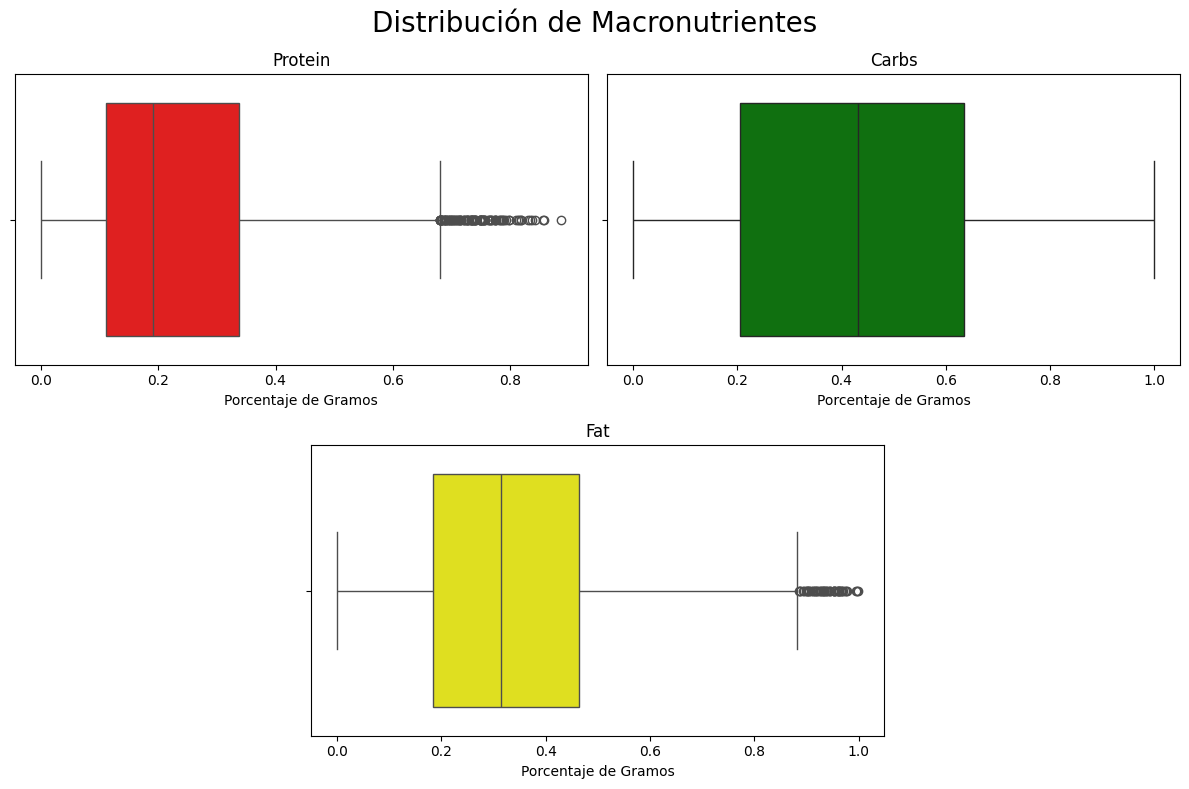

In [97]:
# Plot de la distribución de los macronutrientes

Plot_DistributionMacronutrients(Diets_Dataset,Macronutrients)

## 2.2 Estratificación de Valores Cuantitativos

### Medidas de Tendencia Central y Dispersión por Dieta

Por cada dieta, se presentan los valores de las medidas de tendencia central y de dispersión

In [98]:
diet = Diets[0]
summary_measures = Diets_Dataset.query("Diet_type == @diet")[Macronutrients].describe().loc[measures]
summary_measures.loc['skewness'] = Diets_Dataset[Macronutrients].skew()

print(f'Dieta: {diet}')
summary_measures

Dieta: dash


,Carbs(g),Protein(g),Fat(g)
mean,0.549425,0.196241,0.254334
25%,0.331143,0.068931,0.103381
50%,0.555219,0.156626,0.234742
75%,0.757917,0.282629,0.371292
std,0.278850,0.162871,0.194078
min,0.001526,0.000000,0.000000
max,1.000000,0.833467,0.973404
skewness,0.189556,0.922401,0.461455


In [100]:
diet = Diets[1]
summary_measures = Diets_Dataset.query("Diet_type == @diet")[Macronutrients].describe().loc[measures]
summary_measures.loc['skewness'] = Diets_Dataset[Macronutrients].skew()

print(f'Dieta: {diet}')
summary_measures

Dieta: keto


,Carbs(g),Protein(g),Fat(g)
mean,0.200879,0.301777,0.497344
25%,0.085517,0.158284,0.405354
50%,0.157348,0.302900,0.505751
75%,0.267535,0.409453,0.591887
std,0.160609,0.167027,0.166572
min,0.002060,0.000000,0.000000
max,1.000000,0.856868,0.997940
skewness,0.189556,0.922401,0.461455


In [103]:
diet = Diets[2]
summary_measures = Diets_Dataset.query("Diet_type == @diet")[Macronutrients].describe().loc[measures]
summary_measures.loc['skewness'] = Diets_Dataset[Macronutrients].skew()

print(f'Dieta: {diet}')
summary_measures

Dieta: mediterranean


,Carbs(g),Protein(g),Fat(g)
mean,0.424493,0.279357,0.296150
25%,0.249955,0.159633,0.180357
50%,0.439382,0.227883,0.268336
75%,0.607531,0.377820,0.390404
std,0.214325,0.162853,0.160783
min,0.006733,0.005036,0.001731
max,0.992746,0.887557,0.968722
skewness,0.189556,0.922401,0.461455


In [105]:
diet = Diets[3]
summary_measures = Diets_Dataset.query("Diet_type == @diet")[Macronutrients].describe().loc[measures]
summary_measures.loc['skewness'] = Diets_Dataset[Macronutrients].skew()

print(f'Dieta: {diet}')
summary_measures

Dieta: paleo


,Carbs(g),Protein(g),Fat(g)
mean,0.371307,0.249693,0.379000
25%,0.192399,0.102963,0.256579
50%,0.351300,0.205532,0.382447
75%,0.515054,0.375392,0.488116
std,0.221506,0.175031,0.175471
min,0.003612,0.000000,0.001404
max,0.987368,0.858503,0.968835
skewness,0.189556,0.922401,0.461455


In [107]:
diet = Diets[4]
summary_measures = Diets_Dataset.query("Diet_type == @diet")[Macronutrients].describe().loc[measures]
summary_measures.loc['skewness'] = Diets_Dataset[Macronutrients].skew()

print(f'Dieta: {diet}')
summary_measures

Dieta: vegan


,Carbs(g),Protein(g),Fat(g)
mean,0.593968,0.148489,0.257543
25%,0.504070,0.085339,0.142575
50%,0.626246,0.139688,0.231518
75%,0.714679,0.190381,0.344529
std,0.171203,0.086088,0.160277
min,0.000330,0.001921,0.000112
max,0.986872,0.647416,0.994887
skewness,0.189556,0.922401,0.461455


### Histogramas de Macronutrientes por Dieta

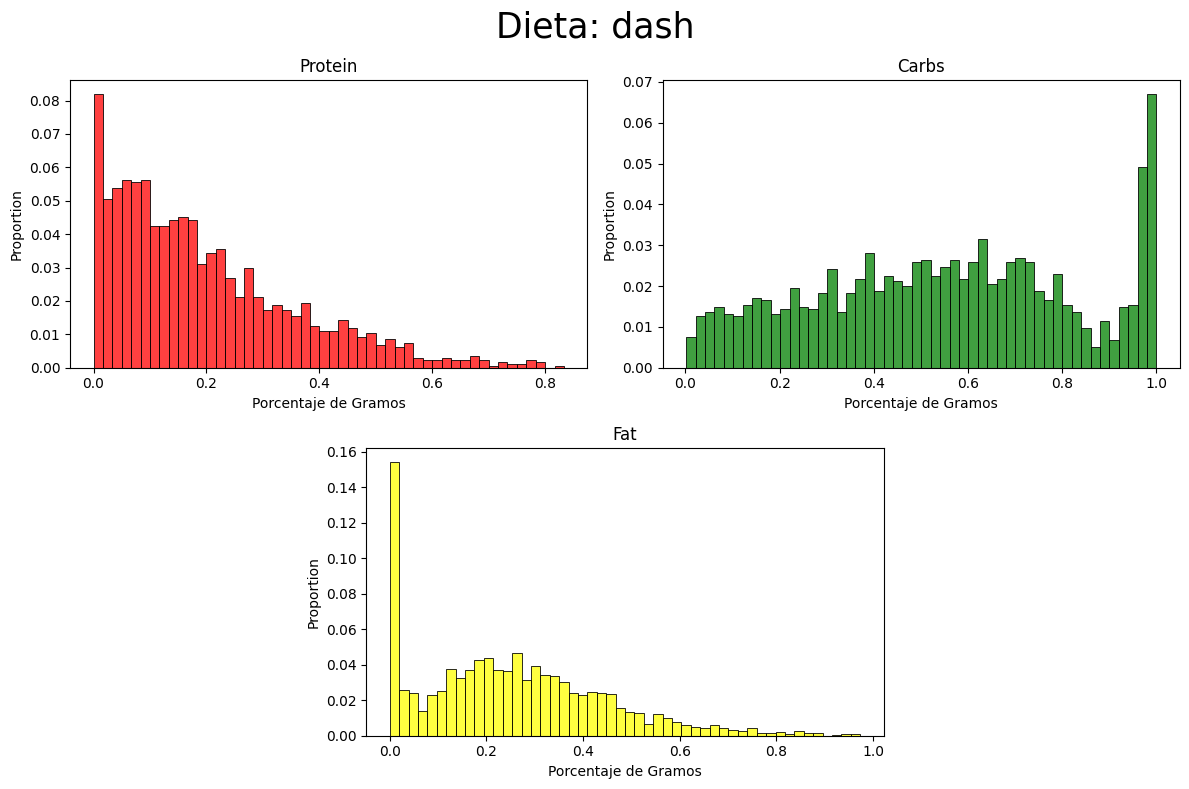

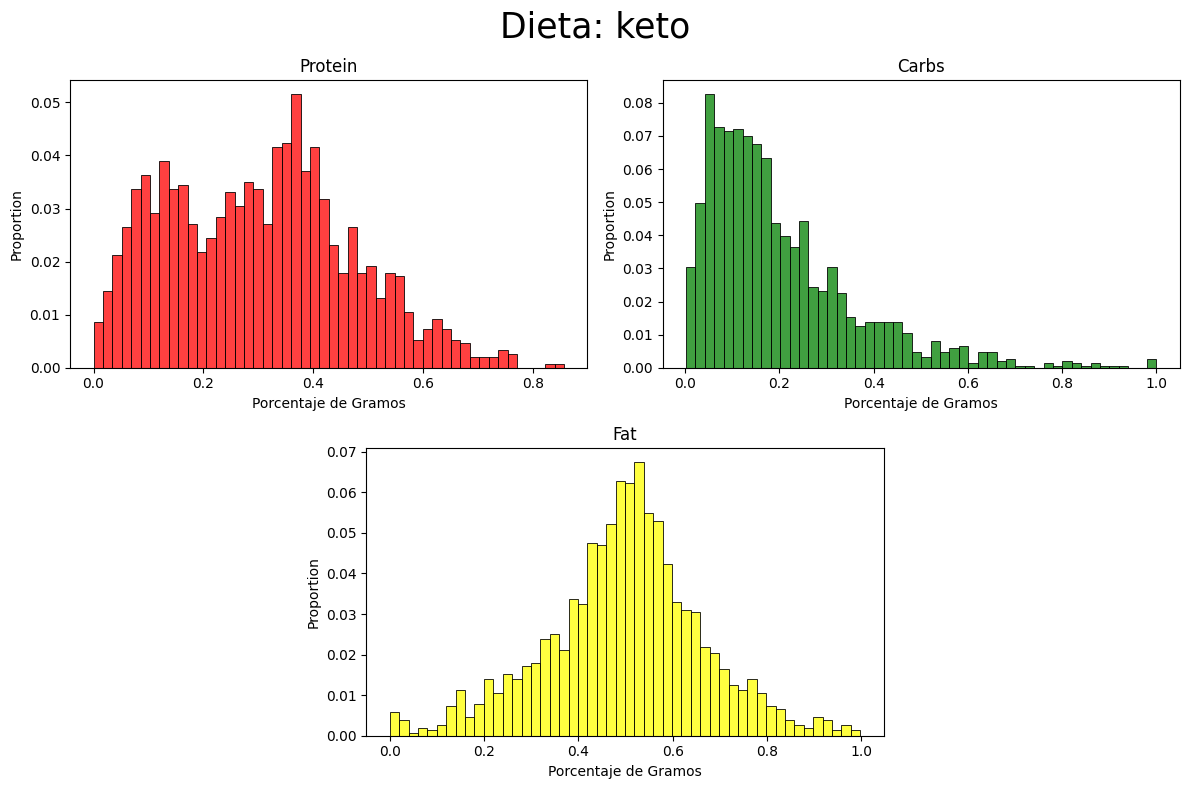

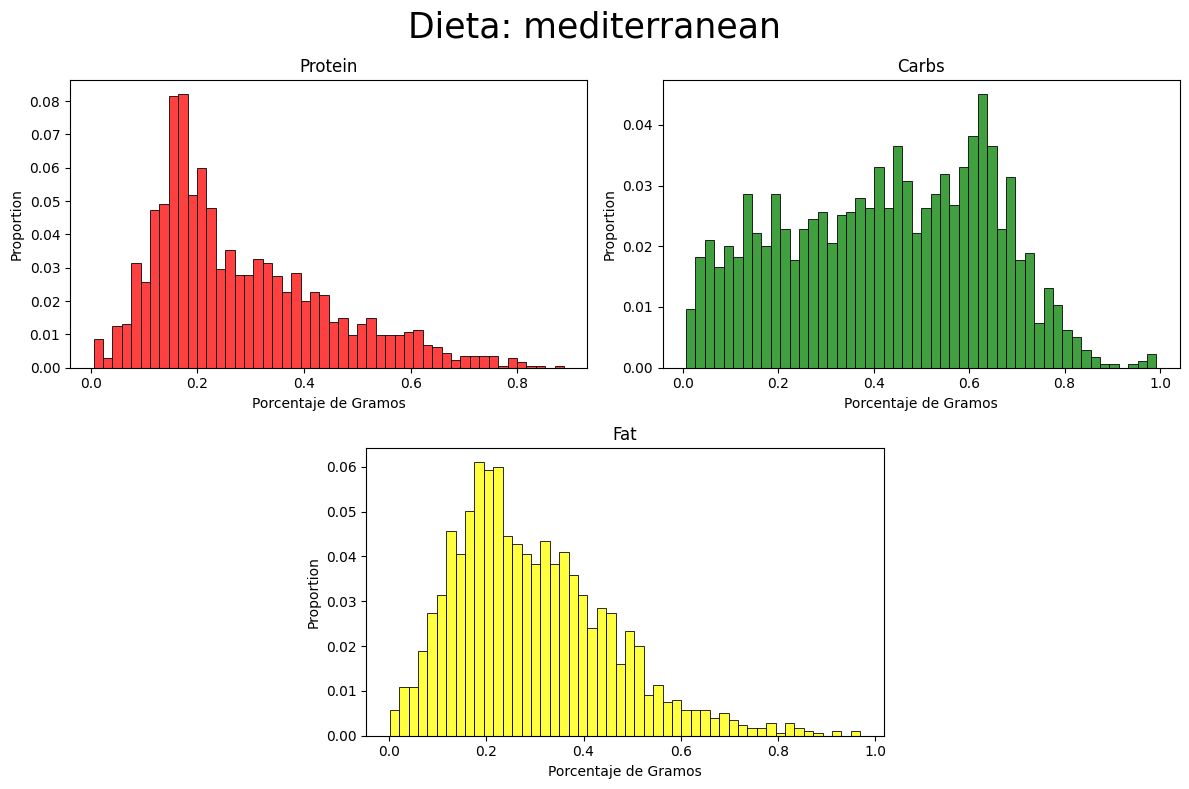

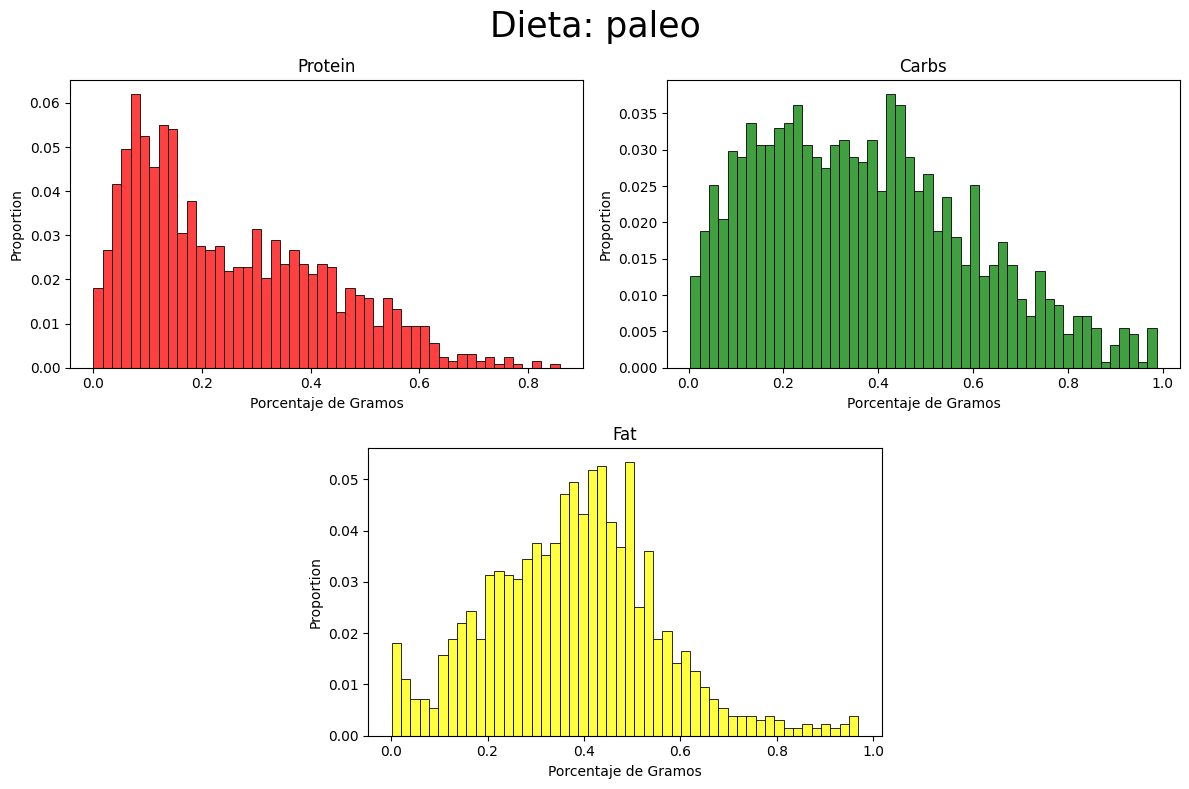

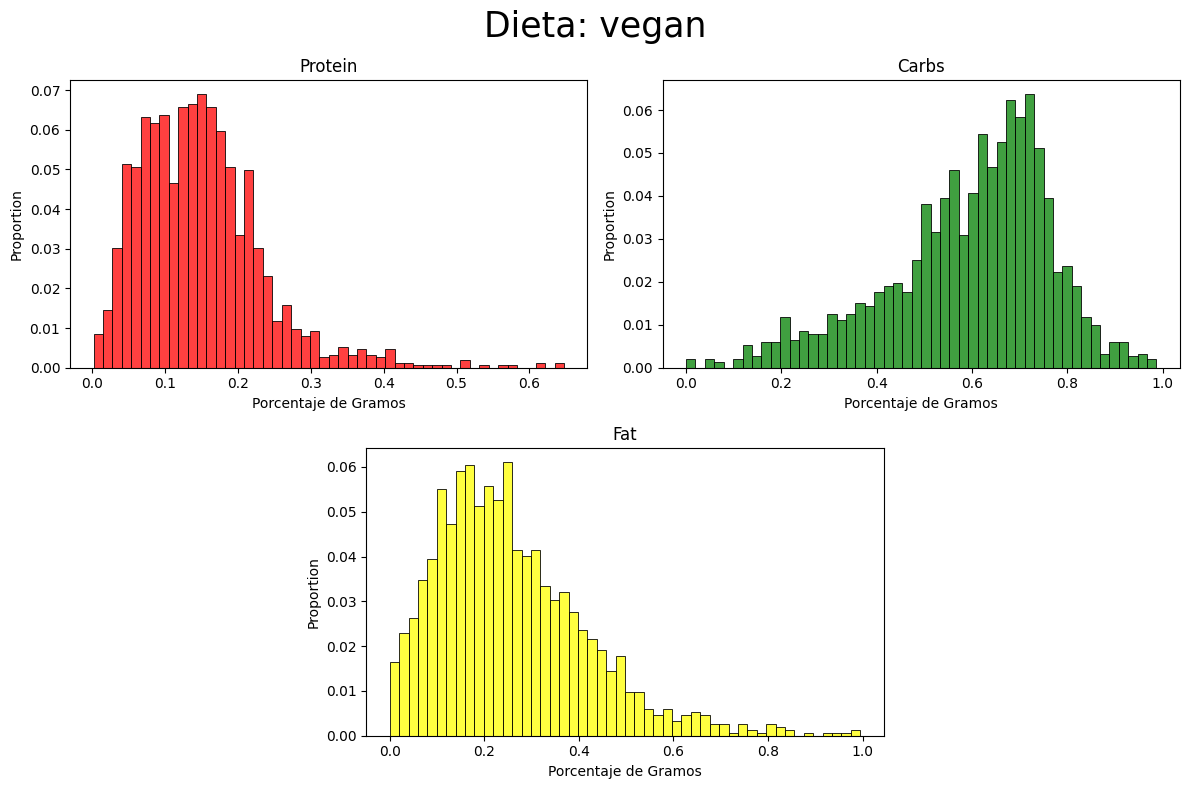

In [92]:
# Histograma de los macronutrientes por dieta

for diet in Diets:
    Plot_MacronutientsByDiet_Histogram(Diets_Dataset,Macronutrients,diet)

### Boxplot de Macronutrientes por Dieta

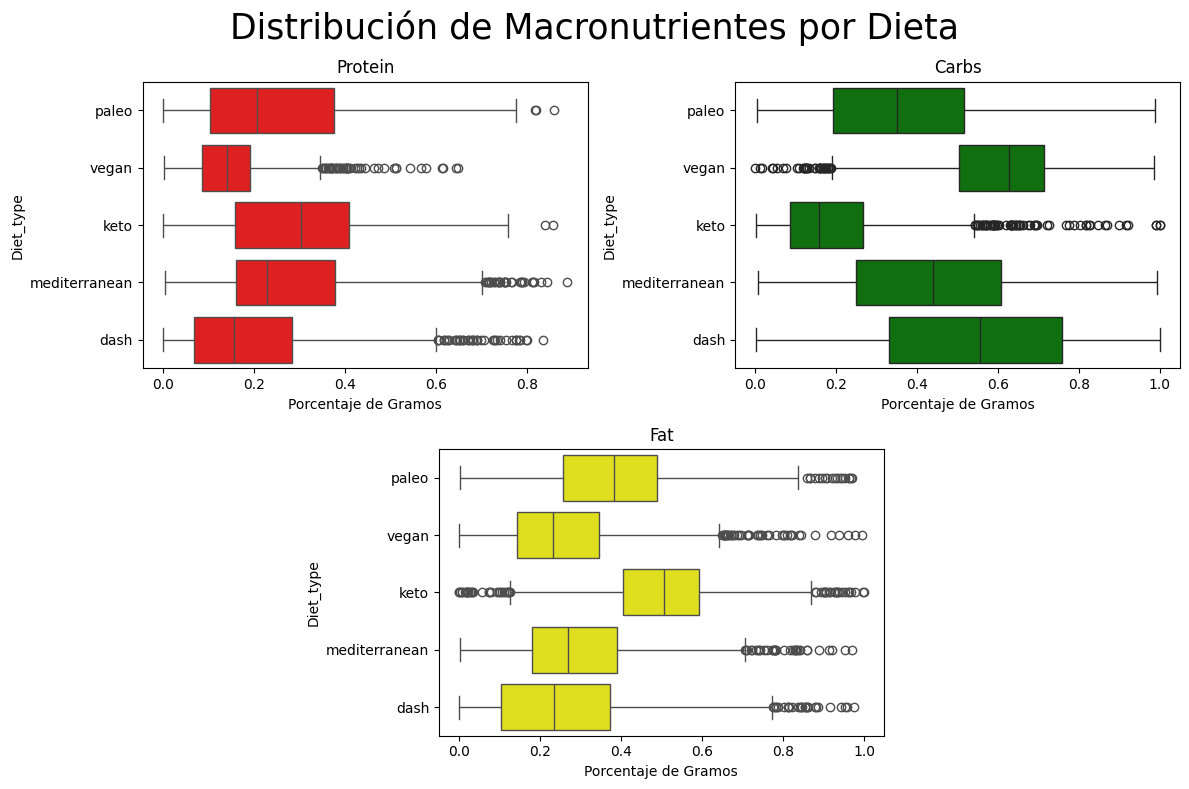

In [91]:
# Boxplot de los macronutrientes por dieta

Plot_MacronutrientsByDiet_Boxplot(Diets_Dataset,Macronutrients)